<a href="https://colab.research.google.com/github/sidharth-red/MCMC/blob/main/MCMC_linear_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emcee
!pip install corner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 966.2 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
import corner
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

#Creating linear synthetic data

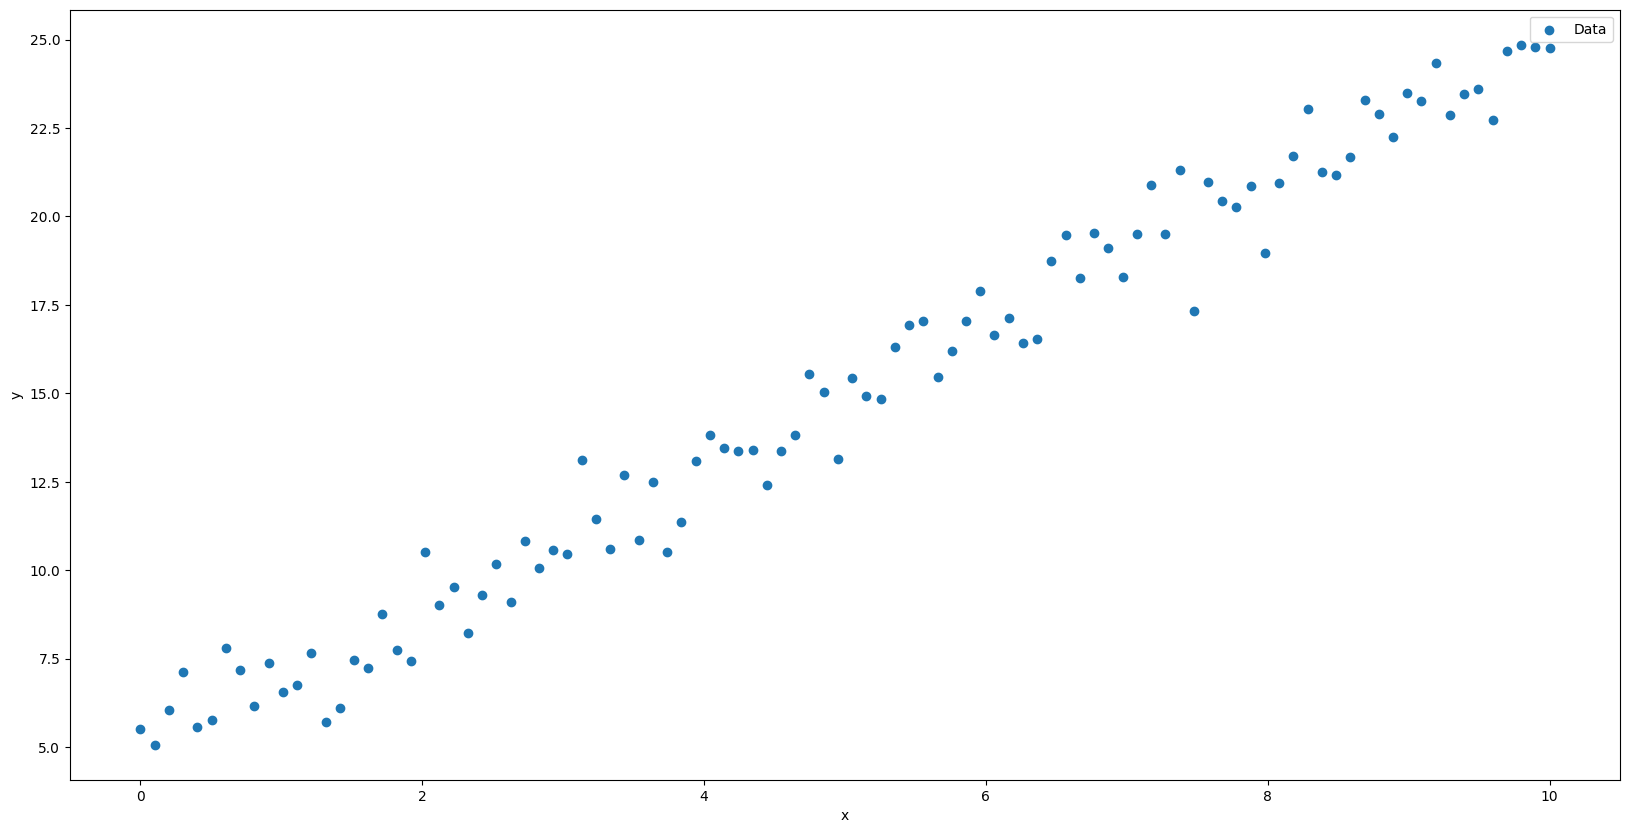

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# True parameters
true_intercept = 5.0
true_slope = 2.0
true_sigma = 1.0

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = true_intercept + true_slope * x + true_sigma * np.random.randn(100)

# Plot the synthetic data
plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
def model(theta,x):
    intercept,slope = theta
    return intercept+slope*x

In [5]:
def lnlike(theta, x, y, yerr):
    return -0.5 * np.sum(((y - model(theta, x))/yerr) ** 2)

In [6]:
def lnprior(theta):
    intercept, slope = theta
    if -10.0 < intercept < 10.0 and 0.0 < slope < 5.0:
        return 0.0
    return -np.inf

In [7]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [9]:
yerr = 0.05*np.full_like(y, true_sigma)
data = (x, y,yerr)
nwalkers = 50
niter = 1000
initial = np.array([1.0, 1.0])
ndim = len(initial)
xrange=range
p0 = [np.array(initial) + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

In [10]:
def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 500)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [11]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)

Running burn-in...
Running production...


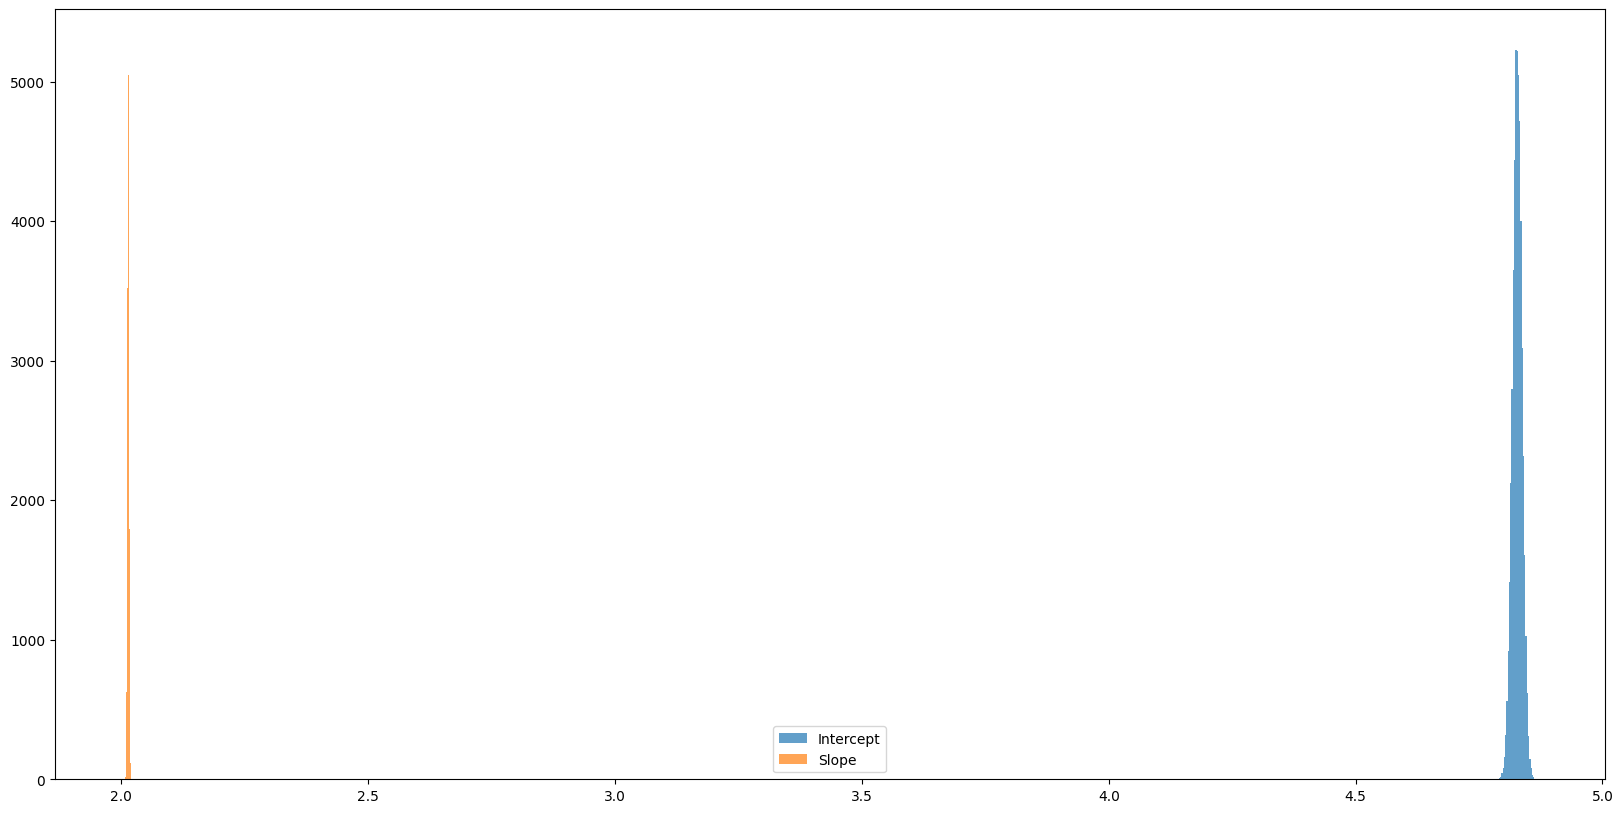

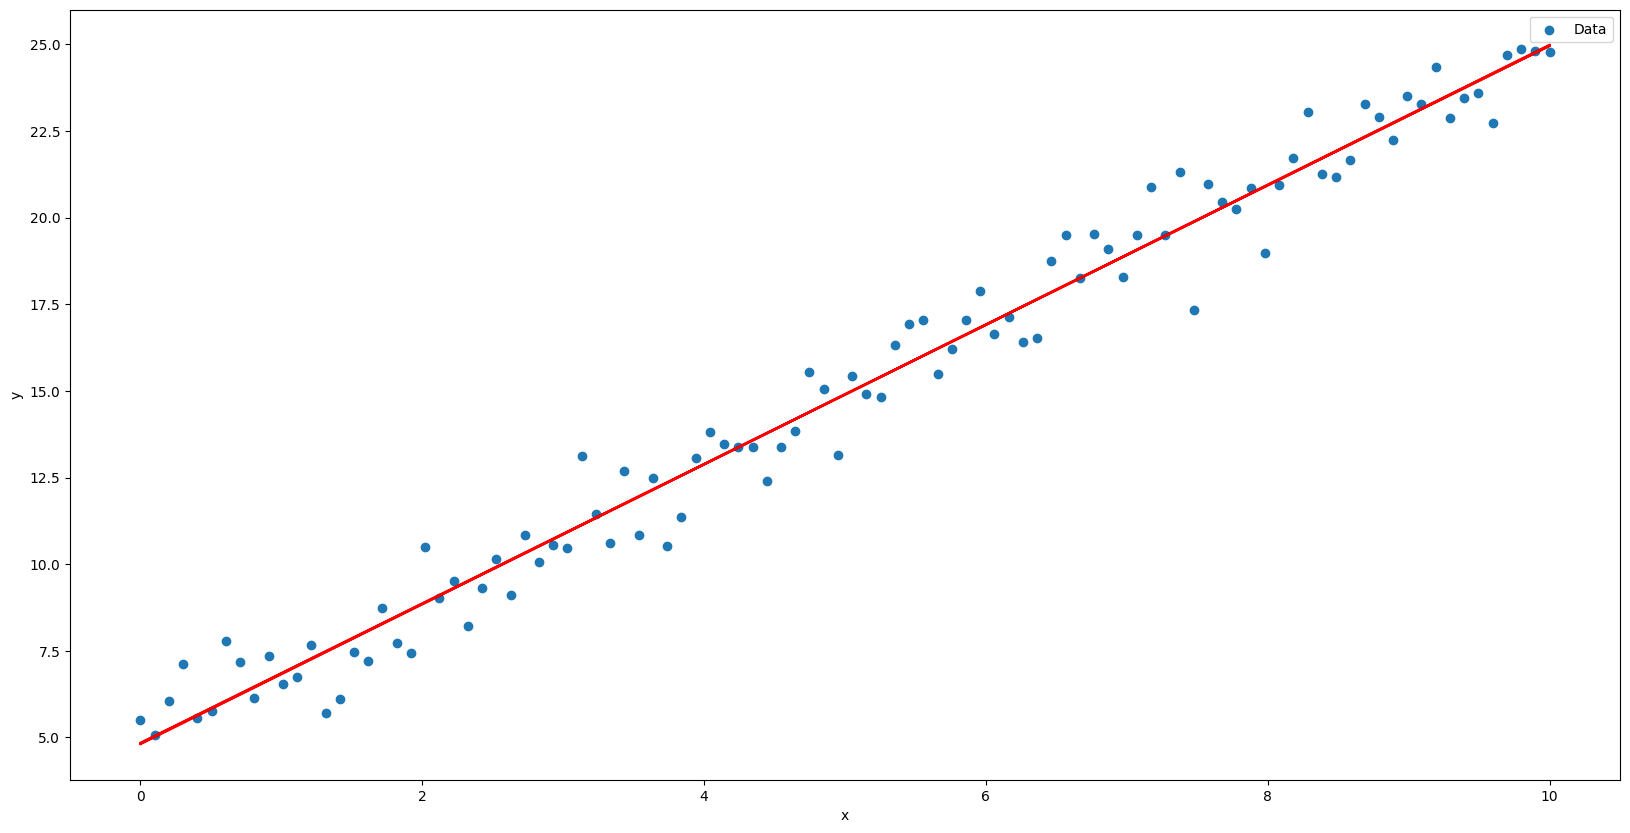

In [12]:
# Plot the results
samples = sampler.flatchain
plt.figure()
plt.hist(samples[:, 0], bins=30, alpha=0.7, label='Intercept')
plt.hist(samples[:, 1], bins=30, alpha=0.7, label='Slope')
plt.legend()
plt.show()

# Plot the model fits
plt.figure()
plt.scatter(x, y, label='Data')
for theta in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(x, model(theta, x), color="r", alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

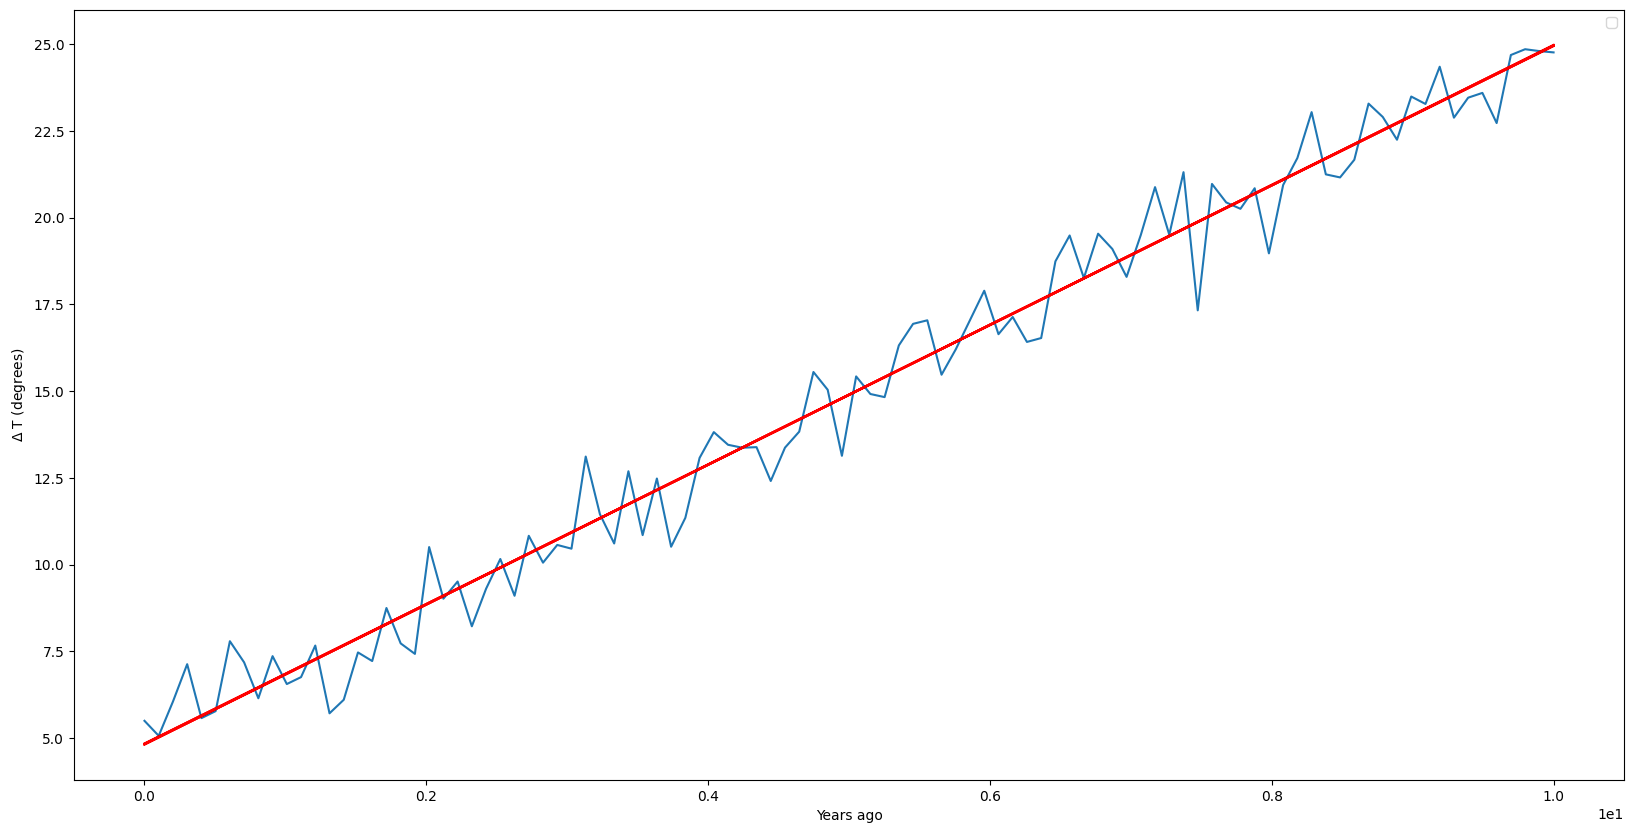

In [13]:
    plt.ion()
    plt.plot(x,y)
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(x, model(theta, x), color="r", alpha=0.1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('Years ago')
    plt.ylabel(r'$\Delta$ T (degrees)')
    plt.legend()
    plt.show()